  Kiran Ponappan Sreekumari <br>
  CSC506 – Design and Analysis of Algorithms <br>
  Colorado State University - Global<br>
  Dr. Dong Nguyen <br>
  January 31, 2024<br>
  Module 3: Critical Thinking - Option #1: Random Number Generator<br><br>
  Using a random number generator, create a list of 500 integers. Perform a benchmark analysis using some of the sorting algorithms from this module. What is the difference in execution speed between the different sorting algorithms? In your paper, be sure to provide a brief discussion of the sorting algorithms used in this activity.



Sorting Algorithms

1.   Seletion Sort
2.   Insertion Sort
3.  Quick Sort
4.  Merge Sort





In [2]:
import random
import timeit
import sys
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
def selection_sort(array):
    """
    Sorts the given array using the selection sort algorithm.
    """
    n = len(array)

    # Traverse through all array elements
    for i in range(n - 1):
        # Find the minimum element in the unsorted part of the array
        min_index = i
        for j in range(i + 1, n):
            if array[j] < array[min_index]:
                min_index = j

        # Swap the found minimum element with the first element
        array[i], array[min_index] = array[min_index], array[i]
    return array

def insertion_sort(array):
  """
  Insertion Sort
  """
  for i in range(1, len(array)):
    current = array[i]
    j = i-1
    while j>=0 and array[j] >current:
      array[j+1] = array[j]
      j -=1
    array[j+1] = current
  return array

def quicksort(array):
  """
  Quick Sort
  """
  if len(array) <= 1:
      return array
  pivot = array[len(array) // 2] # Finding the middle of the array
  left = [x for x in array if x < pivot]
  middle = [x for x in array if x == pivot]
  right = [x for x in array if x > pivot]
  return quicksort(left) + middle + quicksort(right)

def merge_sort(array):
    """
    Sorts the given array using the merge sort algorithm.
    """
    if len(array) > 1:
        mid = len(array) // 2  # Finding the middle of the array
        left_half = array[:mid]  # Dividing the array into two halves
        right_half = array[mid:]

        # Recursive calls to merge_sort for both halves
        merge_sort(left_half)
        merge_sort(right_half)

        # Merge the two sorted halves
        i = j = k = 0

        # Copy data to temporary arrays left_half[] and right_half[]
        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                array[k] = left_half[i]
                i += 1
            else:
                array[k] = right_half[j]
                j += 1
            k += 1

        # Checking if any element was left
        while i < len(left_half):
            array[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            array[k] = right_half[j]
            j += 1
            k += 1
    return array

# **Main**

In [46]:
if __name__ == '__main__':
  n_numbers = 500
  random_list = [random.randint(1, n_numbers) for _ in range(n_numbers)]
  print(random_list)

  result = selection_sort(random_list.copy())

  print(result)


[481, 244, 305, 185, 37, 165, 163, 33, 82, 341, 179, 477, 238, 407, 154, 50, 401, 97, 201, 192, 54, 295, 193, 432, 376, 331, 145, 294, 248, 151, 334, 500, 230, 174, 375, 128, 129, 203, 238, 132, 341, 338, 335, 69, 76, 405, 453, 100, 88, 258, 352, 354, 48, 324, 58, 481, 235, 281, 219, 383, 492, 400, 271, 51, 402, 157, 250, 229, 307, 152, 375, 244, 242, 399, 25, 442, 305, 242, 58, 48, 73, 443, 291, 477, 61, 358, 282, 84, 122, 55, 135, 159, 227, 86, 302, 234, 318, 249, 437, 113, 470, 268, 111, 51, 152, 157, 435, 304, 424, 414, 92, 245, 65, 204, 341, 415, 208, 302, 103, 35, 217, 10, 150, 336, 160, 419, 299, 15, 422, 134, 274, 217, 263, 350, 84, 41, 472, 241, 384, 240, 338, 107, 17, 110, 447, 343, 243, 49, 362, 68, 477, 263, 466, 313, 177, 144, 343, 65, 243, 1, 327, 296, 301, 173, 316, 40, 486, 355, 265, 359, 281, 387, 83, 466, 230, 343, 377, 358, 481, 448, 22, 453, 51, 318, 404, 474, 136, 212, 255, 276, 160, 381, 400, 132, 357, 334, 245, 463, 181, 215, 78, 88, 453, 290, 233, 93, 462, 134, 

In [47]:
ss_time_taken = timeit.timeit(lambda: selection_sort(random_list.copy()), number=1)
is_time_taken = timeit.timeit(lambda: insertion_sort(random_list.copy()), number=1)
qs_time_taken = timeit.timeit(lambda: quicksort(random_list.copy()), number=1)
ms_time_taken = timeit.timeit(lambda: merge_sort(random_list.copy()), number=1)
print(f'Time taken for Selection Sort: {ss_time_taken}')
print(f'Time taken for Insertion Sort: {is_time_taken}')
print(f'Time taken for Quick Sort: {qs_time_taken}')
print(f'Time taken for Merge Sort: {ms_time_taken}')


Time taken for Selection Sort: 0.021166243000152463
Time taken for Insertion Sort: 0.015712706999693182
Time taken for Quick Sort: 0.0012493929998527165
Time taken for Merge Sort: 0.0015336549995481619


**Performance Testing**

In [49]:
lst = []
cols = ['Range','Selection Sort', 'Insertion', 'QuickSort','Merge Sort']

for i in range(1,1000,10):
  random_list = [random.randint(1, i) for _ in range(i)]

  ss_time_taken = timeit.timeit(lambda: selection_sort(random_list.copy()), number=1)
  is_time_taken = timeit.timeit(lambda: insertion_sort(random_list.copy()), number=1)
  qs_time_taken = timeit.timeit(lambda: quicksort(random_list.copy()), number=1)
  ms_time_taken = timeit.timeit(lambda: merge_sort(random_list.copy()), number=1)


  lst.append([i,ss_time_taken,is_time_taken,qs_time_taken,ms_time_taken])



**Plot (Log Scale)**

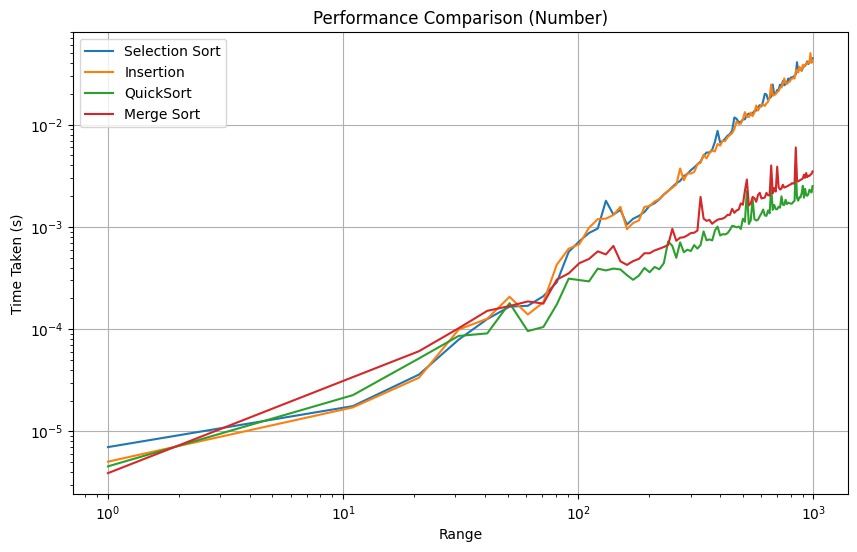

In [50]:

df = pd.DataFrame(lst, columns = cols)
# print(df)

x = df['Range']
y_cols= ['Selection Sort', 'Insertion', 'QuickSort','Merge Sort']
y = df[y_cols]

# Plot the time in matplotlib
plt.figure(figsize=(10, 6))

for col in y_cols:
    plt.plot(x, y[col],  label=col)

plt.title('Performance Comparison (Number)')
plt.xlabel('Range')
plt.ylabel('Time Taken (s)')
plt.xscale('log')  # Log scale for x-axis
plt.yscale('log')  # Log scale for y-axis
plt.grid(True)
plt.legend()
plt.show()

**Plot**

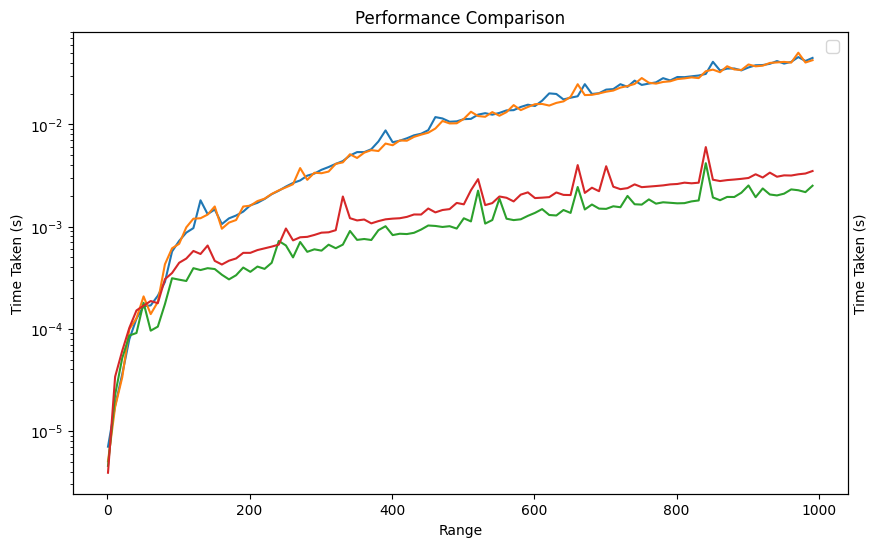

In [51]:
fig, ax1 = plt.subplots(figsize=(10, 6))
for col in y_cols:
    ax1.plot(x, y[col],  label=col)

ax1.set_title('Performance Comparison')
ax1.set_xlabel('Range')
ax1.set_ylabel('Time Taken (s)')

# Set y-axis to log scale
ax1.set_yscale('log')

# Create a second y-axis in absolute scale
ax2 = ax1.twinx()
ax2.set_ylabel('Time Taken (s)')

# Hide the y-axis for the second plot
ax2.set_yticks([])

plt.grid(True)
plt.legend(fontsize="large")
plt.show()